# Timing matvec_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `matvec_real_dumb` , `matvec_real_numba`, `matvec_real_dot` and `dot_real_columns`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import functions as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000])

In [3]:
list_time_dumb = []
list_time_numba = []
list_time_dot = []
list_time_columns = []
list_time_numpy = []
for Ni in tq(N):
    matrix = np.ones((Ni,Ni))
    vector = np.ones(Ni)
    # matvec_real_dumb
    time = %timeit -o fcs.matvec_real_dumb(matrix, vector)
    list_time_dumb.append(time.average)
    # matvec_real_numba
    time = %timeit -o fcs.matvec_real_numba(matrix, vector)
    list_time_numba.append(time.average)
    # matvec_real_dot
    time = %timeit -o fcs.matvec_real_dot(matrix, vector)
    list_time_dot.append(time.average)
    # matvec_real_columns
    time = %timeit -o fcs.matvec_real_columns(matrix, vector)
    list_time_columns.append(time.average)
    # numpy.dot
    time = %timeit -o np.dot(matrix, vector)
    list_time_numpy.append(time.average)

8.69 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.15 times longer than the fastest. This could mean that an intermediate result is being cached.
18.9 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
133 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
535 µs ± 48.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.41 µs ± 34 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
78.4 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
90.1 µs ± 253 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
478 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.78 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.4 µs ± 30.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
215 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
251 µs ± 4.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
882 µs ± 3.79 µs per loop 

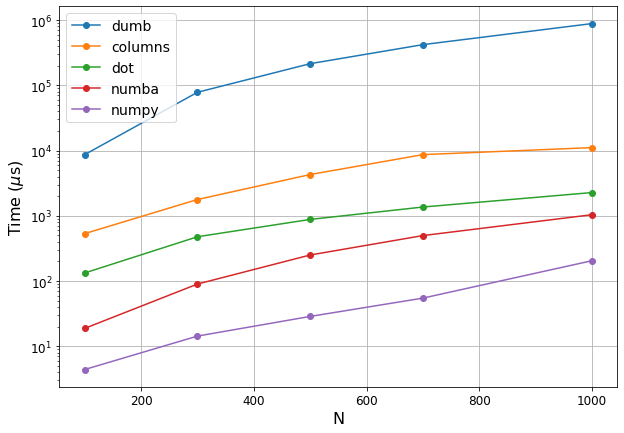

In [5]:
plt.figure(figsize=(10,7))
plt.plot(N, np.asarray(list_time_dumb)*1e6, 'o-', label = 'dumb')
plt.plot(N, np.asarray(list_time_columns)*1e6, 'o-', label = 'columns')
plt.plot(N, np.asarray(list_time_dot)*1e6, 'o-', label = 'dot')
plt.plot(N, np.asarray(list_time_numba)*1e6, 'o-', label = 'numba')
plt.plot(N, np.asarray(list_time_numpy)*1e6, 'o-', label = 'numpy')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()